***
# The Spark Foundation - Task 2
***
### Author : Nitish Kumar K V
## Pediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

`The Dataset has no null values.`
***

***
### **Data Visualization**

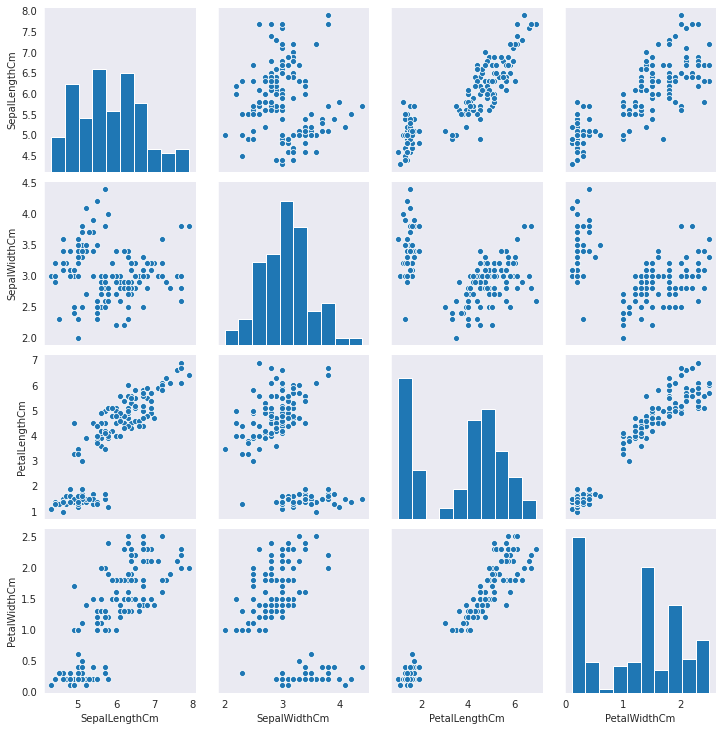

In [6]:
sns.set_style("dark")
sns.pairplot(data[data.columns[1:]], diag_kind="hist")

We can already see some clusters in the plots, but still difficult to mannually get them.
***

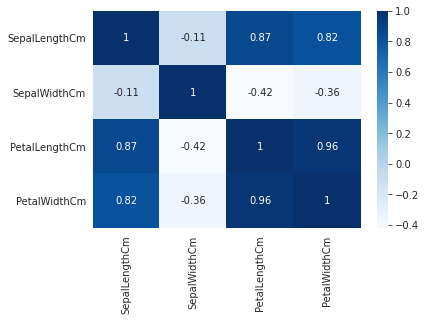

In [7]:
sns.heatmap(data[data.columns[1:]].corr(), annot=True, cmap="Blues")

There is strong correlation between `Petal Length` and `Petal Width`.
***

***
### **Predicting the optimum number of clusters using K-Means Alogorithm**

In [8]:
from sklearn.cluster import KMeans

X = data[data.columns[1:5]].values

kmeans_model = [KMeans(n_clusters=k).fit(X) for k in range(1,11)]
inertia = [model.inertia_ for model in kmeans_model]

print(inertia)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.95701115711987, 34.46066433172302, 29.96334557109558, 27.888869047619057, 26.240272005772013]


Text(0.4, 0.35, 'Elbow')

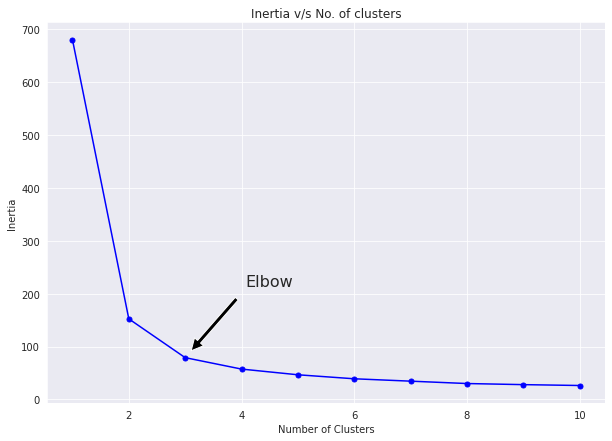

In [9]:
#Now plotting intertia v/s number of clusters to get the inflexion point

sns.set_style("darkgrid")
plt.figure(figsize=[10,7])
plt.plot([i+1 for i in range(10)], inertia, ".b", linestyle="-", markersize=10)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia v/s No. of clusters")

plt.annotate('Elbow',
             xy=(3, inertia[2]),
             xytext=(0.4, 0.35),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

The inertia is not a good performance metric when trying to choose k because it keeps
getting lower as we increase k. This is because, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. So we have to choose a cluster after which the inertia decreases linearly(approximate). `In this case k=3 is the optimum number of clusters.`
***

***
### **Visualizing the Clusters**

In [10]:
kmeans_labels = [str(i) for i in kmeans_model[2].labels_]
label = {"0": "Cluster 1", "1": "Cluster 2", "2": "Cluster 3", }
data["Cluster_label"] = [label[i] for i in kmeans_labels]

clus_centers = kmeans_model[2].cluster_centers_
d = {'Id': [151, 152, 153], 'SepalLengthCm':clus_centers[:,0], 'SepalWidthCm':clus_centers[:,1],'PetalLengthCm':clus_centers[:,2],'PetalWidthCm':clus_centers[:,3], 'Species':["centroid"]*3, 'Cluster_label': ["Cluster Center"]*3}
new_data = pd.concat([data, pd.DataFrame(data=d)])

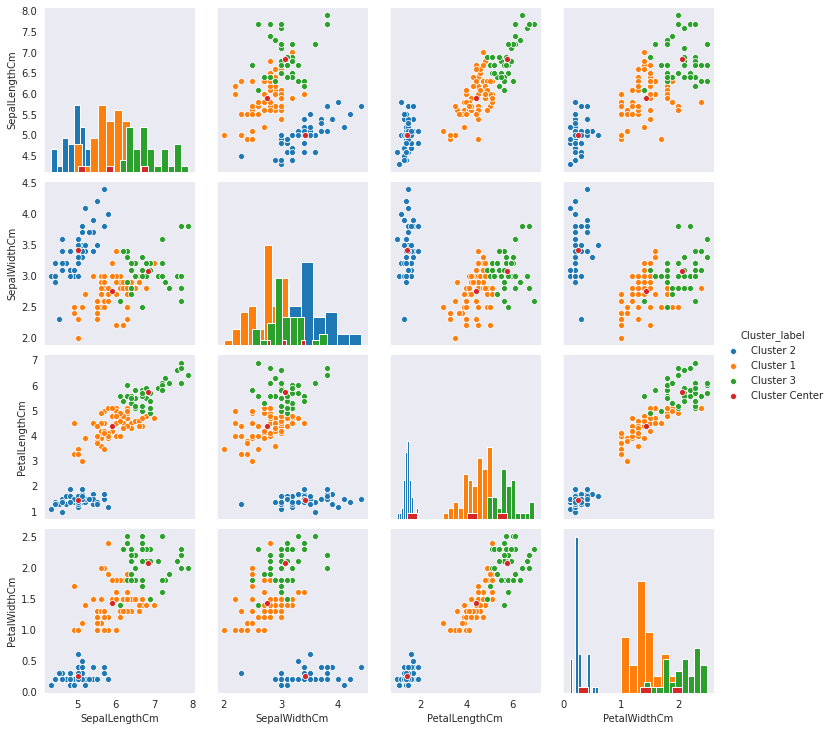

In [13]:
sns.set_style("dark")
sns.pairplot(new_data[new_data.columns[1:]], hue = "Cluster_label", diag_kind="hist")